In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import sklearn.decomposition
import numpy as np
import sklearn.manifold

In [8]:
all_trains = pd.read_csv("../../SYD_DAT_5/data/sydtrains.csv", index_col=1, thousands=',')

In [10]:
trains = all_trains[all_trains.YEAR == 2014]

In [14]:
# a hack to get all the numeric columns for the trains data
numeric_columns = [x for x in trains.columns if x.endswith("0")]
numeric_columns

['IN_0200_0600',
 'OUT_0200_0600',
 'IN_0600_0930',
 'OUT_0600_0930',
 'IN_0930_1500',
 'OUT_0930_1500',
 'IN_1500_1830',
 'OUT_1500_1830',
 'IN_1830_0200',
 'OUT_1830_0200']

In [16]:
# the whiten scales the dimensions the similar scales
pca = sklearn.decomposition.PCA(whiten=True)

In [18]:
# transform the data from in-out-station-people space to synthetic space
mangled_station_data = pca.fit_transform(trains[numeric_columns])

In [25]:
print(np.shape(mangled_station_data))
mangled_station_data

(308, 10)


array([[ -9.99249128,  -0.86429306,  -8.26969232, ...,   0.52481657,
         -0.97881544,   0.01429659],
       [ -9.49158615,   2.10975144,  -4.07870519, ...,  -0.18495588,
         -0.50349106,   0.13775049],
       [ -7.04285247,   5.71226833,  10.11088049, ...,  -0.05141355,
         -0.44220709,  -0.78419011],
       ..., 
       [  0.32010123,   0.60167819,  -0.30881945, ...,  -0.16576932,
         -0.04395234,   0.05612209],
       [  0.32010123,   0.60167819,  -0.30881945, ...,  -0.16576932,
         -0.04395234,   0.05612209],
       [  0.32010123,   0.60167819,  -0.30881945, ...,  -0.16576932,
         -0.04395234,   0.05612209]])

In [29]:
def colouring(line):
    if line == "CBD": return "red"
    elif line == "Western": return "green"
    elif line == "Eastern Suburbs": return "pink"
    else: return "blue"

colour_chart = map(colouring, trains.LINE)

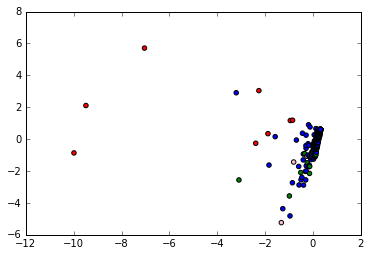

In [31]:
# the pca plot
plt.scatter(mangled_station_data[:,0], mangled_station_data[:,1], c=colour_chart)

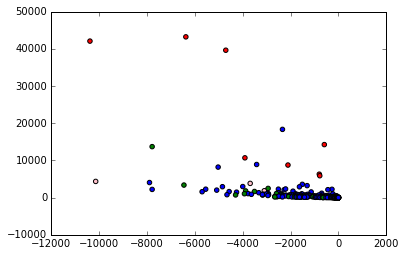

In [33]:
# the original data plot of some of the features
plt.scatter(-trains.IN_0600_0930, trains.OUT_0600_0930, c=colour_chart)

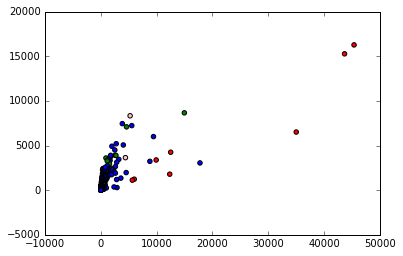

In [34]:
plt.scatter(trains.IN_1500_1830, trains.OUT_1500_1830, c=colour_chart)

In [36]:
# shows the dimensions of most importance
pca.explained_variance_ratio_

array([  9.25253343e-01,   6.13005818e-02,   9.75370440e-03,
         1.78539213e-03,   1.02884474e-03,   4.50450877e-04,
         3.71449167e-04,   5.16184369e-05,   4.48104295e-06,
         1.33981591e-07])

In [43]:
# turning them to a percentage
# this says that pca dimension 1 has data scattered all over the place
# pca dimension 2 has not very much
# pca dimension 3 has almost none
# pca dimension 4 and beyond: don't even bother

for r in pca.explained_variance_ratio_:
    print("%.2f" % (r*100))

92.53
6.13
0.98
0.18
0.10
0.05
0.04
0.01
0.00
0.00


In [37]:
# get the coefficients of the synthetic features in terms of the in-out-station-people axes
pca.components_

array([[-0.01216888, -0.01181708, -0.13570067, -0.59073739, -0.243829  ,
        -0.32006833, -0.60005267, -0.20835379, -0.23880968, -0.09962957],
       [-0.01119104, -0.00516797, -0.637461  ,  0.33967958, -0.24082972,
        -0.15102742,  0.18628327, -0.52786231,  0.0797915 , -0.27855756],
       [ 0.00560474, -0.00450715,  0.40359311,  0.42393126, -0.27283612,
        -0.66111334,  0.07761719,  0.05264239, -0.3686114 ,  0.03409918],
       [ 0.00653215,  0.005783  , -0.11162783,  0.05920499, -0.25380845,
        -0.34804601, -0.20313728,  0.35921969,  0.77966863,  0.14218445],
       [-0.00422339, -0.00167244, -0.20918806, -0.14272018,  0.2436577 ,
        -0.25405611,  0.1899084 , -0.25989915, -0.03726531,  0.84079463],
       [-0.0084373 , -0.02423273,  0.39522302, -0.1236274 , -0.67429792,
         0.34138853,  0.15157494, -0.3875952 ,  0.17532311,  0.22954217],
       [-0.03164292,  0.01273045,  0.27397658,  0.43191696,  0.33258827,
         0.09438617, -0.60461027, -0.45598628

In [47]:
x = pca.components_[5]

In [54]:
numeric_columns

['IN_0200_0600',
 'OUT_0200_0600',
 'IN_0600_0930',
 'OUT_0600_0930',
 'IN_0930_1500',
 'OUT_0930_1500',
 'IN_1500_1830',
 'OUT_1500_1830',
 'IN_1830_0200',
 'OUT_1830_0200']

In [55]:
# synthetic space to in-out-station-people space
pca.inverse_transform([0,0,0,0,0,1,0,0,0,0])

array([   50.75150934,    29.08833169,  1241.44024812,  1110.03537645,
         666.75985407,   865.84192507,  1251.81355587,  1067.86956094,
         414.1063575 ,   551.52134441])

In [52]:
mangled_station_data[trains.index == 'Central']

array([[-9.99249128, -0.86429306, -8.26969232, -6.17066718, -1.63718664,
         2.43026268,  2.82833108,  0.52481657, -0.97881544,  0.01429659]])

In [53]:
mangled_station_data[trains.index == "Bondi Junction"]

array([[-1.32061629, -5.23695032,  2.29484114,  1.42884695, -1.36474663,
         5.99142405,  1.92812231, -1.48419539,  1.72644061, -0.06481982]])

In [56]:
# fake bondi
pca.inverse_transform([-1.3, -5, 2, 0,0,6,2,0,0,0])

array([  268.79276949,   170.52538641,  9718.67797976,  4260.36564932,
        4477.12607503,  4723.39694641,  5353.09290799,  7794.13873323,
        1604.2383566 ,  4463.71960403])

In [57]:
numeric_columns

['IN_0200_0600',
 'OUT_0200_0600',
 'IN_0600_0930',
 'OUT_0600_0930',
 'IN_0930_1500',
 'OUT_0930_1500',
 'IN_1500_1830',
 'OUT_1500_1830',
 'IN_1830_0200',
 'OUT_1830_0200']

In [58]:
# fake central
pca.inverse_transform([-10,0,0,0,0,0,0,0,0,0])

array([   961.61493118,    916.26403361,  11318.20142194,  45280.68631509,
        19001.13668724,  24730.66775277,  46073.28415773,  16703.63718178,
        18233.24479258,   7959.73876086])

In [ ]:
# notice how this gives ~50k people OUT_0600_0930 and ~50k IN_1500_1830 which is the right ballpark figure
# for the city stations. So the first component really captures the "cityness"

In [59]:
# getting only 2 principal components
simplifier = sklearn.decomposition.PCA(whiten=True, n_components=2)
simplified_data = simplifier.fit_transform(trains[numeric_columns])

In [60]:
simplified_data

array([[ -9.99249128e+00,  -8.64293060e-01],
       [ -9.49158615e+00,   2.10975144e+00],
       [ -7.04285247e+00,   5.71226833e+00],
       [ -3.09312274e+00,  -2.56002800e+00],
       [ -3.20762483e+00,   2.90955318e+00],
       [ -2.39183662e+00,  -2.58609347e-01],
       [ -1.83743736e+00,  -1.62604137e+00],
       [ -1.32061629e+00,  -5.23695032e+00],
       [ -1.25954002e+00,  -4.36105965e+00],
       [ -1.88067667e+00,   3.45007538e-01],
       [ -2.25922559e+00,   3.04325248e+00],
       [ -9.59150871e-01,  -4.81643143e+00],
       [ -1.57813698e+00,   1.55865986e-01],
       [ -9.84131498e-01,  -3.56265955e+00],
       [ -8.57598095e-01,  -2.73547475e+00],
       [ -8.04225883e-01,  -1.43436013e+00],
       [ -5.80001780e-01,  -2.87453133e+00],
       [ -4.98311828e-01,  -2.54384632e+00],
       [ -5.94508410e-01,  -1.71277446e+00],
       [ -4.60240465e-01,  -2.39547651e+00],
       [ -5.07409934e-01,  -2.09305422e+00],
       [ -9.47336062e-01,   1.16755332e+00],
       [ -

In [61]:
# analysis: out_0600_0930 and in_1500_1830 is very important
zip(numeric_columns, simplifier.inverse_transform([1,0]))

[('IN_0200_0600', -38.804350261350784),
 ('OUT_0200_0600', -55.233546218111108),
 ('IN_0600_0930', 162.07271494896895),
 ('OUT_0600_0930', -3284.6043457948481),
 ('IN_0930_1500', -1044.3636687243181),
 ('OUT_0930_1500', -1582.5667752767076),
 ('IN_1500_1830', -3257.8284157727603),
 ('OUT_1500_1830', -425.39943246353437),
 ('IN_1830_0200', -1399.6101935440481),
 ('OUT_1830_0200', -230.93816180059684)]

In [62]:
zip(numeric_columns, simplifier.inverse_transform([0,1]))

[('IN_0200_0600', 30.614477050420906),
 ('OUT_0200_0600', 23.142704318733365),
 ('IN_0600_0930', -50.027296361223762),
 ('OUT_0600_0930', 1783.8689112078268),
 ('IN_0930_1500', 314.66670487106359),
 ('OUT_0930_1500', 519.01167837246578),
 ('IN_1500_1830', 1585.1741736313752),
 ('OUT_1500_1830', 116.32887548867564),
 ('IN_1830_0200', 538.69093487624468),
 ('OUT_1830_0200', -22.196630775093695)]

In [63]:
reconstituted = simplifier.inverse_transform(simplified_data)

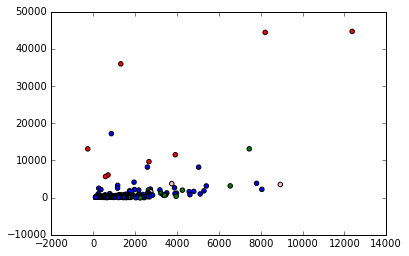

In [67]:
# the reconstituted data
plt.scatter(reconstituted[:,2], reconstituted[:,3], c=colour_chart)

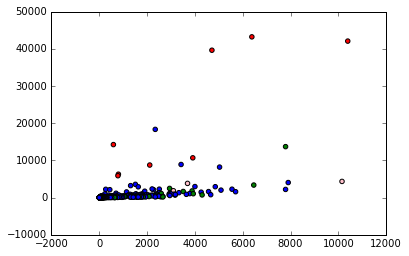

In [68]:
# original data, so they are pretty similar
plt.scatter(trains.IN_0600_0930, trains.OUT_0600_0930, c=colour_chart)

In [69]:
simplifier.explained_variance_ratio_

array([ 0.92525334,  0.06130058])

In [70]:
simplifier.components_

array([[-0.01216888, -0.01181708, -0.13570067, -0.59073739, -0.243829  ,
        -0.32006833, -0.60005267, -0.20835379, -0.23880968, -0.09962957],
       [-0.01119104, -0.00516797, -0.637461  ,  0.33967958, -0.24082972,
        -0.15102742,  0.18628327, -0.52786231,  0.0797915 , -0.27855756]])

In [71]:
# using the sparse PCA

In [80]:
sparse = sklearn.decomposition.SparsePCA()
sparse_data = sparse.fit_transform(trains[numeric_columns])

In [81]:
# we want to see some big spikes on some features to say that they really represent something.
# eg, cityness really corresponds to a linear comb of OUT_0600_0930 and IN_1500_1830
sparse.components_

array([[ -1.02395432e+03,  -1.25964144e+03,  -2.30820223e+04,
         -8.01963459e+04,  -3.37971764e+04,  -4.41878004e+04,
         -8.13805373e+04,  -3.16159586e+04,  -3.13522729e+04,
         -1.46650014e+04],
       [  0.00000000e+00,  -2.06666015e+01,   2.57715945e+04,
         -1.26574484e+04,   7.45670056e+03,   3.46418448e+03,
         -7.03696433e+03,   1.87147078e+04,  -3.66073579e+03,
          9.63345971e+03],
       [  0.00000000e+00,   0.00000000e+00,   4.69674069e+03,
          5.94272579e+03,  -3.64101184e+03,  -9.75708116e+03,
          6.44854619e+02,   0.00000000e+00,  -4.89229588e+03,
          0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,  -4.75847047e+02,
          1.90238465e+02,  -1.25748452e+03,  -1.45712886e+03,
          0.00000000e+00,   1.07517653e+02,   4.84796695e+03,
          2.53641381e+02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.65363051e+02,  -5.65427123e+02,   8.50681104e+02,
          0.00000000e+00

In [104]:
# using manifold learning
lle = sklearn.manifold.LocallyLinearEmbedding(n_components=2, n_neighbors=20, method='modified')

In [105]:
lle_transformed = lle.fit_transform(trains[numeric_columns])

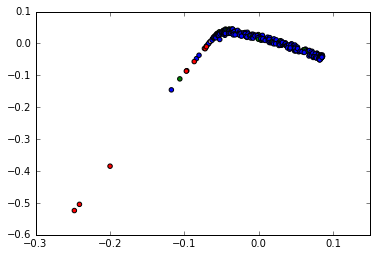

In [107]:
plt.scatter(lle_transformed[:,0], lle_transformed[:,1], c=colour_chart)